In [1]:
import os
import cv2
import numpy as np
import torch
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'sklearn'

In [ ]:

def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    return images


In [ ]:

def preprocess_images(images):
    processed_images = []
    for img in images:
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        img_tensor = torch.tensor(img, dtype=torch.float32) /255  
        processed_images.append(img_tensor)
    return processed_images


In [ ]:

# Main code
image_folder = '/home/ravi/R@vi_Saxena/Ravi_saxena/Ravi_PhD/3.CV/Ass_2/data_ass_2'
images = load_images(image_folder)
processed_images = preprocess_images(images)


In [ ]:

def ratio_cut_clustering(images, num_clusters):
    segmented_images = []
    for img in images:
       
        gray_img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
        
        flattened_img = gray_img.flatten().reshape((-1, 1))
        
     
        kmeans = KMeans(n_clusters=num_clusters, random_state=43)
        labels = kmeans.fit_predict(flattened_img)
        
        
        labels_img = labels.reshape(gray_img.shape) 
        segmented_img = np.zeros_like(np.array(img))
        
        for label in range(num_clusters):
            segmented_img[labels_img == label] = np.array(img)[labels_img == label]
        
        segmented_images.append(segmented_img)
    
    return segmented_images


In [ ]:
def kmeans_clustering(images, num_clusters):
    segmented_images = []
    for img in images:
        flattened_img = img.reshape((-1, 3)) 
        kmeans = KMeans(n_clusters=num_clusters, random_state=43)
        labels = kmeans.fit_predict(flattened_img)
        segmented_img = labels.reshape((128,128))
        segmented_images.append(segmented_img)

    return segmented_images

In [ ]:

def visualize_results(original_images, segmented_images, method_name):
    plt.figure(figsize=(8,8))
    for i in range(len(original_images)):
        plt.subplot(2, len(original_images), i + 1)
        plt.imshow(original_images[i])
        plt.title('Original')
        plt.axis('off')
        
        plt.subplot(2, len(segmented_images), i + len(original_images) + 1)
        plt.imshow(segmented_images[i])
        plt.title(f'{method_name} Segmented Image {i+1}')
        plt.axis('off')
    plt.tight_layout()  
    plt.show()    
  


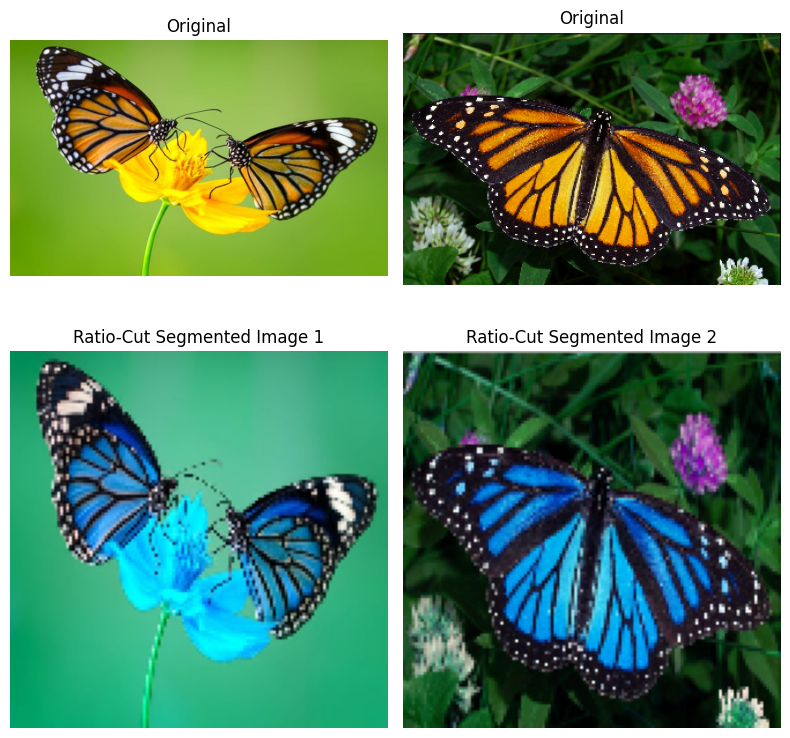

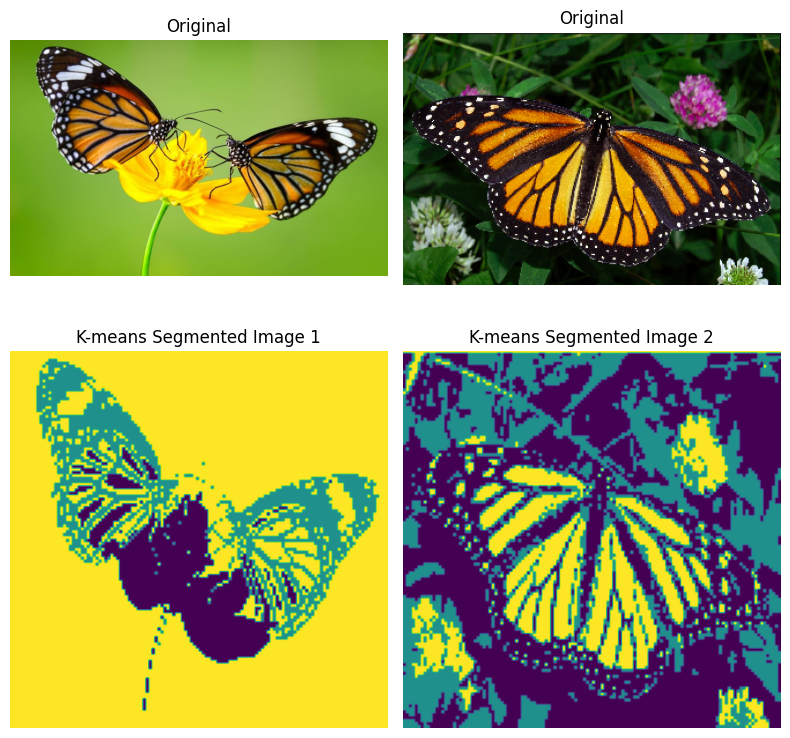

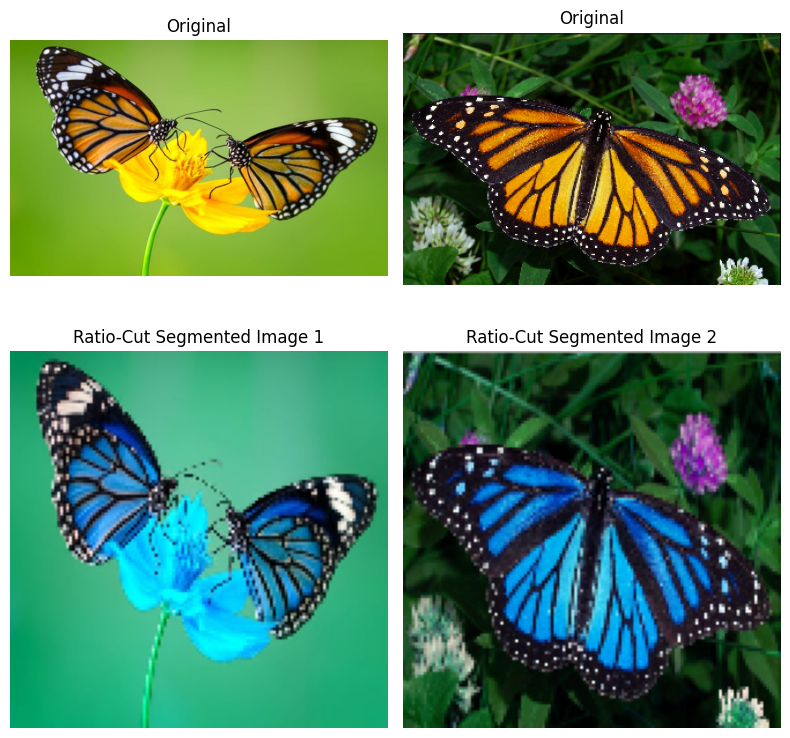

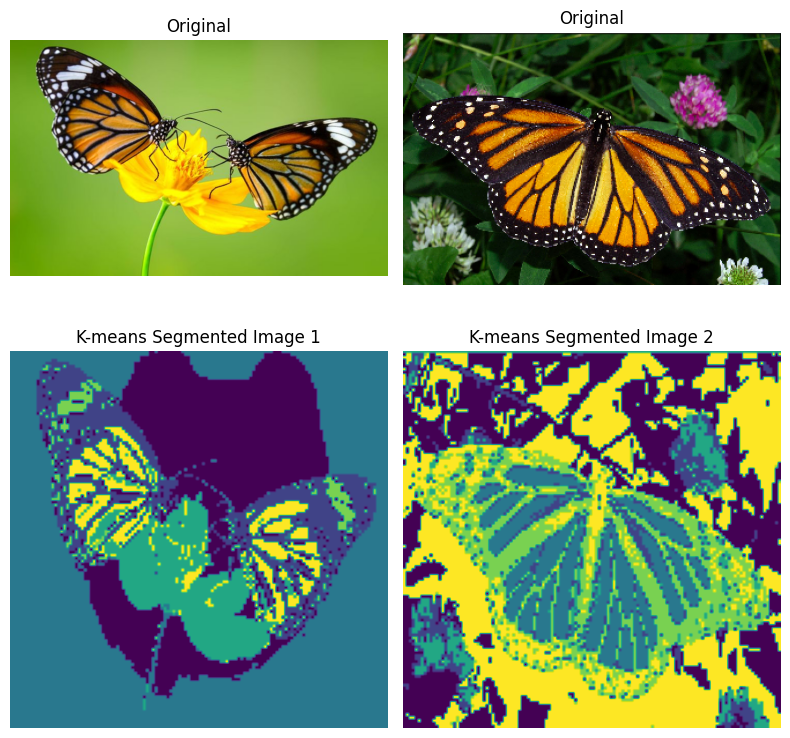

In [ ]:

num_clusters_list = [3, 6]
methods = ['Ratio-Cut', 'K-means']

for num_clusters in num_clusters_list:
    for method in methods:
        if method == 'Ratio-Cut':
            segmented_images = ratio_cut_clustering(processed_images, num_clusters)
        elif method == 'K-means':
            segmented_images = kmeans_clustering(processed_images, num_clusters)
        
        visualize_results(images, segmented_images, method)
